# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Rehan Athallah Azhar
- Email: Azharrehan502@gmail.com
- Id Dicoding: rehan_azhar

**Latar Belakang**

  Jaya Jaya Institut merupakan salah satu institusi pendidikan perguruan yang telah berdiri sejak tahun 2000. Hingga saat ini ia telah mencetak banyak lulusan dengan reputasi yang sangat baik. Akan tetapi, terdapat banyak juga siswa yang tidak menyelesaikan pendidikannya alias dropout.

  Jumlah dropout yang tinggi ini tentunya menjadi salah satu masalah yang besar untuk sebuah institusi pendidikan. Oleh karena itu, Jaya Jaya Institut ingin mendeteksi secepat mungkin siswa yang mungkin akan melakukan dropout sehingga dapat diberi bimbingan khusus.


**Pertanyaan Bisnis**
1. Berapa proporsi mahasiswa yang keluar (drop out) dibandingkan total mahasiswa?
2. Bagaimana distribusi status mahasiswa berdasarkan berbagai fitur?
3. Faktor apa saja yang paling mempengaruhi kelulusan/dropout mahasiswa?

**Tujuan**
1. Mengidentifikasi besaran proporsi mahasiswa yg drop out
2. Distribusi status mahasiswa berdasarkan berbagai fitur
3. Faktor yang paling mempengaruhi kelulusan/dropout mahasiswa




## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import numpy as np
import re

import os
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency

from pyspark.ml import Pipeline
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sqlalchemy import create_engine

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

### Menyiapkan data yang akan digunakan

In [2]:
# download dataset on https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/README.md
df = pd.read_csv("./data.csv", sep=";")

In [3]:
df.head(5)

Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1                     37   
3                         122.0            1                     38   
4                         100.0            1                     37   

   Fathers_qualification  Mothers_occupation  Fathers_occupation  \
0                     12                   5                   9   
1                      3                   3                   3   
2                     37                   9                   9   
3                     37                   5                   3   
4                     38                   9                   9   

   Admission_grade  Displaced  Educational_special_needs  Debtor  \
0            127.3          1                          0       0   
1            142.5          1                          0       0   
2            124.8          1                          0       0   
3            119.6          1                          0       0   
4            141.5          0                          0       0   

   Tuition_fees_up_to_date  Gender  Scholarship_holder  Age_at_enrollment  \
0                        1       1                   0                 20   
1                        0       1                   0                 19   
2                        0       1                   0                 19   
3                        1       0                   0                 20   
4                        1       0                   0                 45   

   International  Curricular_units_1st_sem_credited  \
0              0                                  0   
1              0                                  0   
2              0                                  0   
3              0                                  0   
4              0                                  0   

   Curricular_units_1st_sem_enrolled  Curricular_units_1st_sem_evaluations  \
0                                  0                                     0   
1                                  6                                     6   
2                                  6                                     0   
3                                  6                                     8   
4                                  6                                     9   

   Curricular_units_1st_sem_approved  Curricular_units_1st_sem_grade  \
0                                  0                        0.000000   
1                                  6                       14.000000   
2                                  0                        0.000000   
3                                  6                       13.428571   
4                                  5                       12.333333   

   Curricular_units_1st_sem_without_evaluations  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Curricular_u

## Data Understanding

### Data Cleansing

In [4]:
# Check null values
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0
International                                   0
Curricular_units_1st_sem_credited               0
Curricular_units_1st_sem_enrolled               0
Curricular_units_1st_sem_evaluations            0
Curricular_units_1st_sem_approved               0
Curricular_units_1st_sem_grade                  0
Curricular_units_1st_sem_without_evaluations    0
Curricular_units_2nd_sem_credited               0
Curricular_units_2nd_sem_enrolled               0
Curricular_units_2nd_sem_evaluations            0
Curricular_units_2nd_sem_approved               0
Curricular_units_2nd_sem_grade                  0
Curricular_units_2nd_sem_without_evaluations    0
Unemployment_rate                               0
Inflation_rate                                  0
GDP                                             0
Status                                          0
dtype: int64

In [5]:
# Check duplicate values
print(df.duplicated().sum())

0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [7]:
df.describe()

Marital_status  Application_mode  Application_order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime_evening_attendance  Previous_qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                      1.000000                1.000000   
50%                      1.000000                1.000000   
75%                      1.000000                1.000000   
max                      1.000000               43.000000   

       Previous_qualification_grade  Nacionality  Mothers_qualification  \
count                   4424.000000  4424.000000            4424.000000   
mean                     132.613314     1.873192              19.561935   
std                       13.188332     6.914514              15.603186   
min                       95.000000     1.000000               1.000000   
25%                      125.000000     1.000000               2.000000   
50%                      133.100000     1.000000              19.000000   
75%                      140.000000     1.000000              37.000000   
max                      190.000000   109.000000              44.000000   

       Fathers_qualification  Mothers_occupation  Fathers_occupation  \
count            4424.000000         4424.000000         4424.000000   
mean               22.275316           10.960895           11.032324   
std                15.343108           26.418253           25.263040   
min                 1.000000            0.000000            0.000000   
25%                 3.000000            4.000000            4.000000   
50%                19.000000            5.000000            7.000000   
75%                37.000000            9.000000            9.000000   
max                44.000000          194.000000          195.000000   

       Admission_grade    Displaced  Educational_special_needs       Debtor  \
count      4424.000000  4424.000000                4424.000000  4424.000000   
mean        126.978119     0.548373                   0.011528     0.113698   
std          14.482001     0.497711                   0.106760     0.317480   
min          95.000000     0.000000                   0.000000     0.000000   
25%         117.900000     0.000000                   0.000000     0.000000   
50%         126.100000     1.000000                   0.000000     0.000000   
75%         134.800000     1.000000                   0.000000     0.000000   
max         190.000000     1.000000                   1.000000     1.000000   

       Tuition_fees_up_to_date       Gender  Scholarship_holder  \
count              4424.000000  4424.000000         4424.000000   
mean                  0.880651     0.351718            0.248418   
std                   0.324235     0.477560            0.432144   
min                   0.000000     0.000000            0.000000   
25%                   1.000000     0.000000            0.000000   
50%                   1.000000     0.000000            0.000000   
75%                   1.000000     1.000000            0.000000   
max                   1.000000     1.000000            1.000000   

       Age_at_enrollment  International  Curricular_units_1st_sem_credited  \
count        4424.000000    4424.000000                       

In [8]:
# Assume 0 as missing value in grade columns
cols_with_zero_invalid = [
    "Previous_qualification_grade",
    "Admission_grade",
    "Curricular_units_1st_sem_grade",
    "Curricular_units_2nd_sem_grade"
]

df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, np.nan)

In [9]:
# Fix negative values
df['Unemployment_rate'] = df['Unemployment_rate'].apply(lambda x: np.nan if x < 0 else x)
df['Inflation_rate'] = df['Inflation_rate'].apply(lambda x: np.nan if x < 0 else x)

In [10]:
df['Status'].apply(lambda x: f"'{x}'").value_counts()

Status
'Graduate'    2209
'Dropout'     1421
'Enrolled'     794
Name: count, dtype: int64

In [11]:
# Missing value count
df.isnull().sum()

Marital_status                                    0
Application_mode                                  0
Application_order                                 0
Course                                            0
Daytime_evening_attendance                        0
Previous_qualification                            0
Previous_qualification_grade                      0
Nacionality                                       0
Mothers_qualification                             0
Fathers_qualification                             0
Mothers_occupation                                0
Fathers_occupation                                0
Admission_grade                                   0
Displaced                                         0
Educational_special_needs                         0
Debtor                                            0
Tuition_fees_up_to_date                           0
Gender                                            0
Scholarship_holder                                0
Age_at_enrollment                                 0
International                                     0
Curricular_units_1st_sem_credited                 0
Curricular_units_1st_sem_enrolled                 0
Curricular_units_1st_sem_evaluations              0
Curricular_units_1st_sem_approved                 0
Curricular_units_1st_sem_grade                  718
Curricular_units_1st_sem_without_evaluations      0
Curricular_units_2nd_sem_credited                 0
Curricular_units_2nd_sem_enrolled                 0
Curricular_units_2nd_sem_evaluations              0
Curricular_units_2nd_sem_approved                 0
Curricular_units_2nd_sem_grade                  870
Curricular_units_2nd_sem_without_evaluations      0
Unemployment_rate                                 0
Inflation_rate                                  923
GDP                                               0
Status                                            0
dtype: int64

In [12]:
# Missing value in percentage
missing_percent = df.isnull().mean() * 100
missing_percent

Marital_status                                   0.000000
Application_mode                                 0.000000
Application_order                                0.000000
Course                                           0.000000
Daytime_evening_attendance                       0.000000
Previous_qualification                           0.000000
Previous_qualification_grade                     0.000000
Nacionality                                      0.000000
Mothers_qualification                            0.000000
Fathers_qualification                            0.000000
Mothers_occupation                               0.000000
Fathers_occupation                               0.000000
Admission_grade                                  0.000000
Displaced                                        0.000000
Educational_special_needs                        0.000000
Debtor                                           0.000000
Tuition_fees_up_to_date                          0.000000
Gender                                           0.000000
Scholarship_holder                               0.000000
Age_at_enrollment                                0.000000
International                                    0.000000
Curricular_units_1st_sem_credited                0.000000
Curricular_units_1st_sem_enrolled                0.000000
Curricular_units_1st_sem_evaluations             0.000000
Curricular_units_1st_sem_approved                0.000000
Curricular_units_1st_sem_grade                  16.229656
Curricular_units_1st_sem_without_evaluations     0.000000
Curricular_units_2nd_sem_credited                0.000000
Curricular_units_2nd_sem_enrolled                0.000000
Curricular_units_2nd_sem_evaluations             0.000000
Curricular_units_2nd_sem_approved                0.000000
Curricular_units_2nd_sem_grade                  19.665461
Curricular_units_2nd_sem_without_evaluations     0.000000
Unemployment_rate                                0.000000
Inflation_rate                                  20.863472
GDP                                              0.000000
Status                                           0.000000
dtype: float64

In [13]:
# Drop rows where Inflation_rate is missing
df = df.dropna(subset=['Inflation_rate'])

In [14]:
# ffill + bfill for specific columns grouped by Course
missing_columns = [
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_grade'
]
for col in missing_columns:
    df[col] = df.groupby('Course')[col].transform(lambda x: x.ffill().bfill())

In [15]:
# Final cleaned data
cleaned_df = df.copy()
cleaned_df.head()

# export
cleaned_df.to_csv('cleaned_data.csv', index=False)

**Explanation**


1. **Why Empty data in Inflation_rate is deleted?**

  Inflation_rate is not student-specific data; it is a macroeconomic condition of the country.

  We don’t know if the Inflation_rate applies to:
  - The year the student enrolled,
  - The year of graduation,
  - Or the current year.

  Since there is no clear relationship between Inflation_rate and student-related variables, it’s better to remove it to avoid contaminating the model or analysis.

  Rather than risking incorrect imputation or interpretation, it’s safer to discard it.

2. **Why continue with ffill & bfill for Curricular_units_1st_sem_grade and Curricular_units_2nd_sem_grade?**

  Both columns represent students' academic grades → It makes sense to perform imputation within a single course.

  We assume that students within the same course and cohort have similar grading patterns.

  Forward fill (ffill) and backward fill (bfill) are still applied, grouped by Course, to maintain academic validity.

### EDA

In [16]:
df_eda = cleaned_df.copy()

In [17]:
categorical_cols = [
    'Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance',
    'Previous_qualification', 'Nacionality', 'Mothers_qualification',
    'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Displaced',
    'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender',
    'Scholarship_holder', 'International', 'Status'
]

low_cat_cols = [
    'Marital_status', 'Daytime_evening_attendance', 'Displaced',
    'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender',
    'Scholarship_holder', 'International', 'Status'
]

high_cat_cols = [
    'Application_mode', 'Course', 'Previous_qualification', 'Nacionality',
    'Fathers_qualification', 'Mothers_qualification','Mothers_occupation', 'Fathers_occupation',
]

# mapping
marital_status_mapping = {
    1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced',
    5: 'Facto union', 6: 'Legally separated'
}

day_time_mapping = {0: 'Daytime', 1: 'Evening'}
yes_no_mapping = {0: 'No', 1: 'Yes'}


df_eda['Daytime_evening_attendance'] = df_eda['Daytime_evening_attendance'].map(day_time_mapping)
df_eda['Marital_status'] = df_eda['Marital_status'].map(marital_status_mapping)
df_eda['Gender'] = df_eda['Gender'].map({0: 'Female', 1: 'Male'})


for col in ['Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'International']:
    if col in df_eda.columns:
        df_eda[col] = df_eda[col].map(yes_no_mapping)


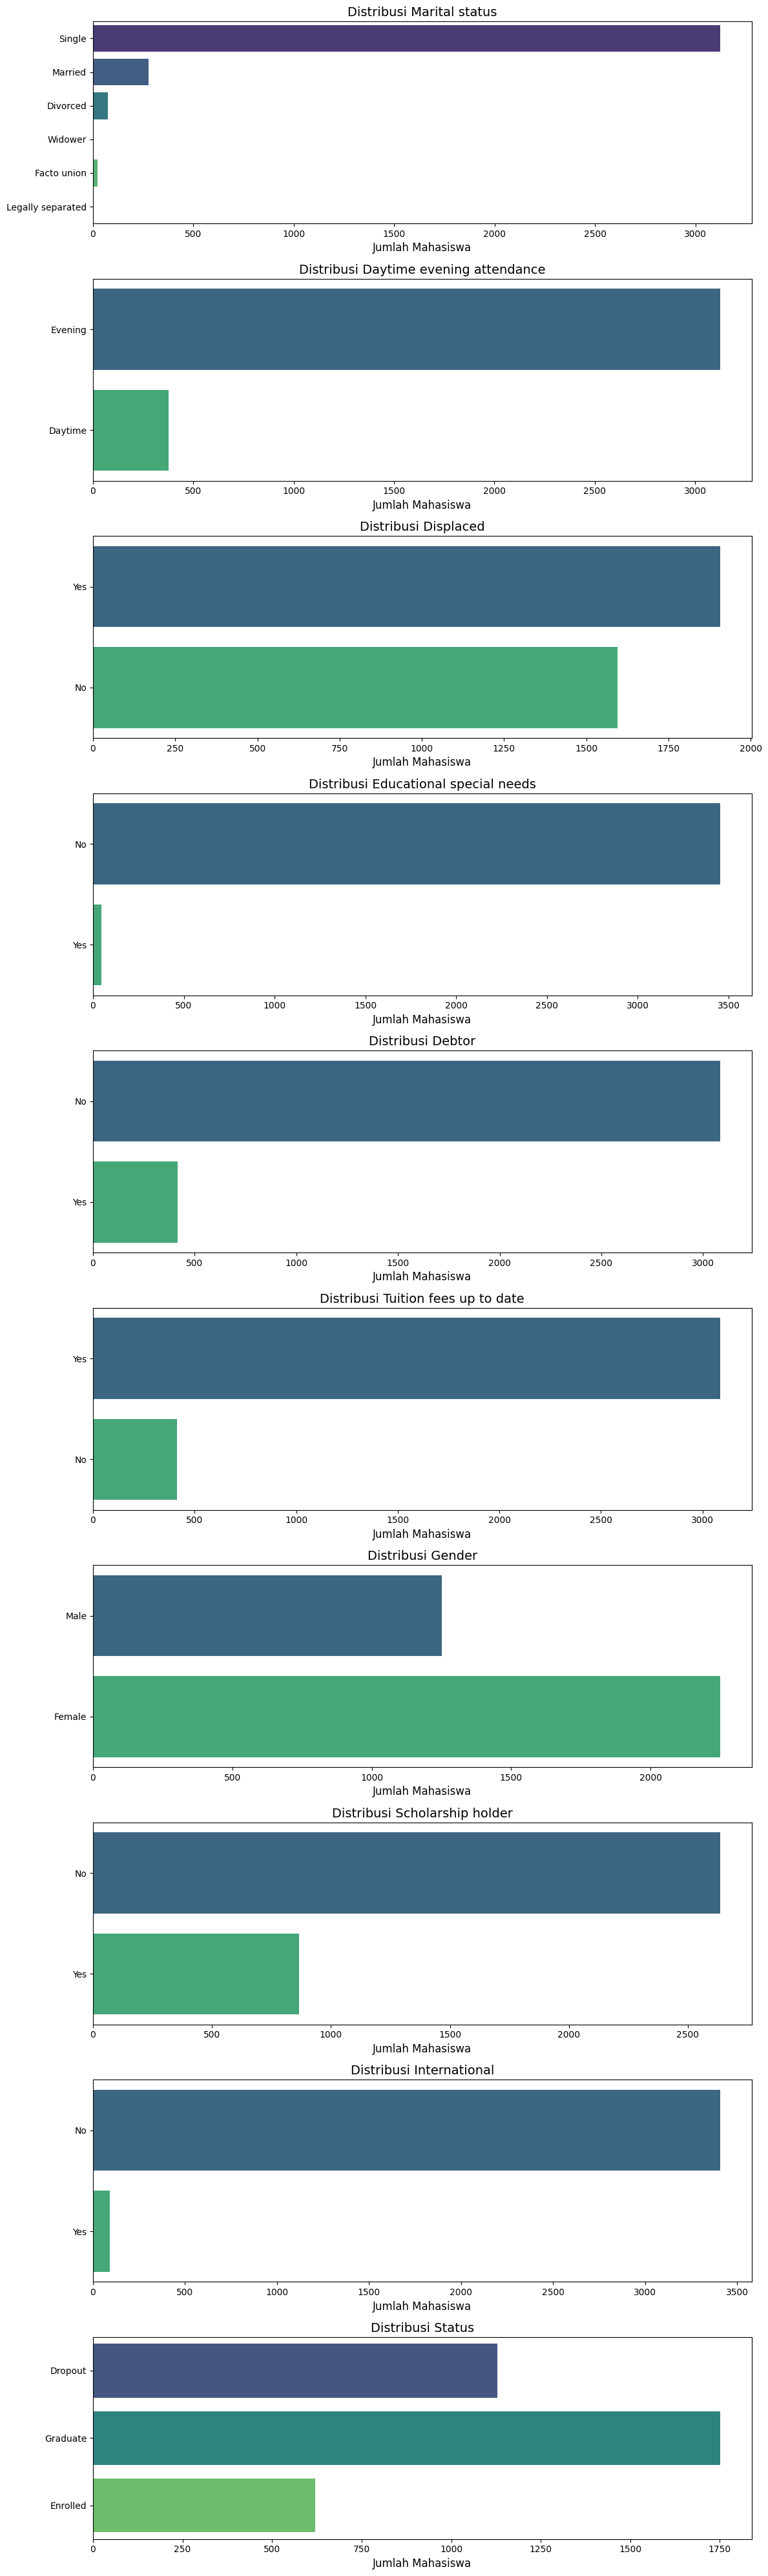

In [18]:
# Low_cat_cols visualization
fig, axes = plt.subplots(len(low_cat_cols), 1, figsize=(12, 4 * len(low_cat_cols)))
axes = axes.flatten()

for i, col_name in enumerate(low_cat_cols):
    sns.countplot(y=col_name, data=df_eda,
                  ax=axes[i], palette="viridis")
    axes[i].set_title(f'Distribusi {col_name.replace("_", " ")}', fontsize=14)
    axes[i].set_xlabel('Jumlah Mahasiswa', fontsize=12)
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].tick_params(axis='x', labelsize=10)

plt.tight_layout()
plt.show()

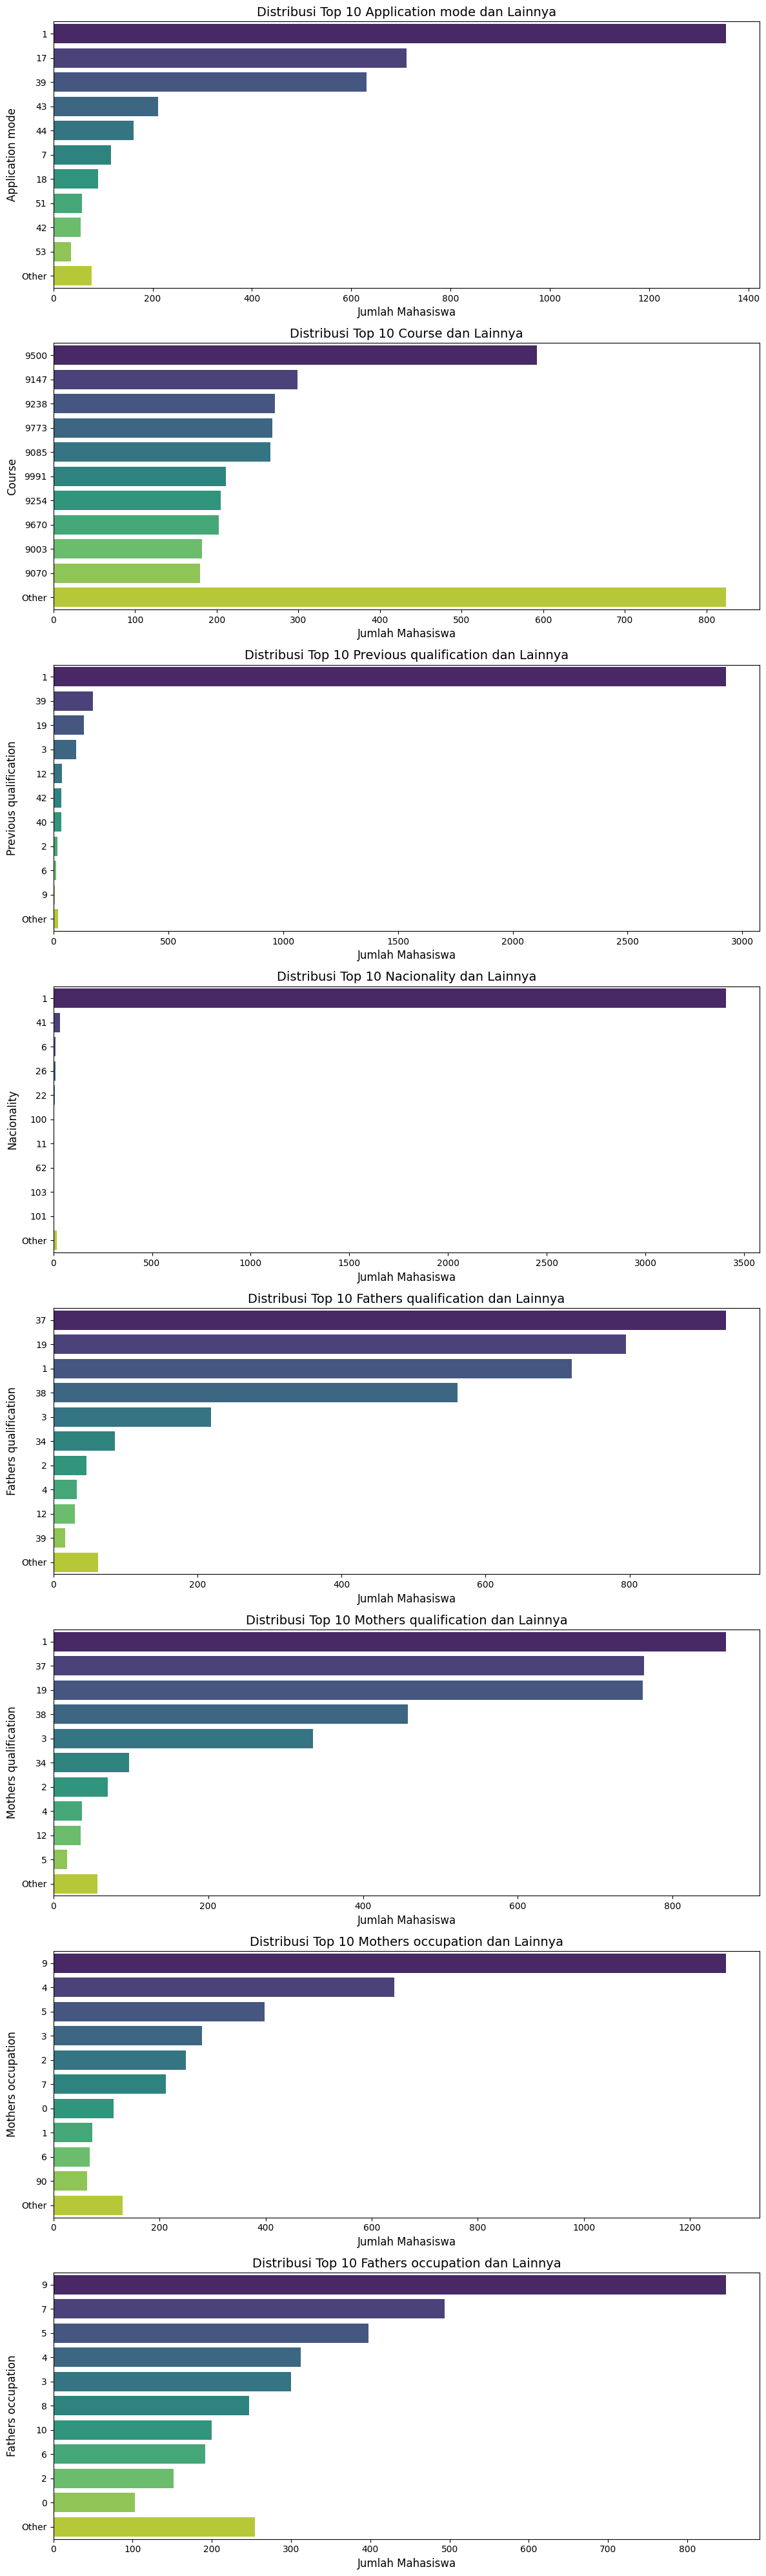

In [19]:
# high_cat_cols visualization
top_n = 10

fig, axes = plt.subplots(len(high_cat_cols), 1, figsize=(12, 5 * len(high_cat_cols)))
axes = axes.flatten()

for i, col_name in enumerate(high_cat_cols):

    # Calculate the frequency and take the top category
    category_counts = df_eda[col_name].value_counts(dropna=False)
    top_categories = category_counts.nlargest(top_n).index

    # Create a temporary column for visualization with “Other”
    df_eda_temp = df_eda.copy()
    df_eda_temp[f'{col_name}_grouped'] = df_eda_temp[col_name].apply(
        lambda x: x if x in top_categories else 'Other'
    )

    # make 'Other' sequences are at the end
    plot_order = df_eda_temp[f'{col_name}_grouped'].value_counts(dropna=False).index.tolist()
    if 'Other' in plot_order:
        plot_order.remove('Other') # Remove 'Other' from its original position
        plot_order.append('Other') # Add 'Other' at the end

    # visualization
    sns.countplot(y=f'{col_name}_grouped', data=df_eda_temp,
                  order=plot_order,
                  ax=axes[i], palette="viridis")

    axes[i].set_title(f'Distribusi Top {top_n} {col_name.replace("_", " ")} dan Lainnya', fontsize=14)
    axes[i].set_xlabel('Jumlah Mahasiswa', fontsize=12)
    axes[i].set_ylabel(col_name.replace("_", " "), fontsize=12)
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].tick_params(axis='x', labelsize=10)

plt.tight_layout()
plt.show()


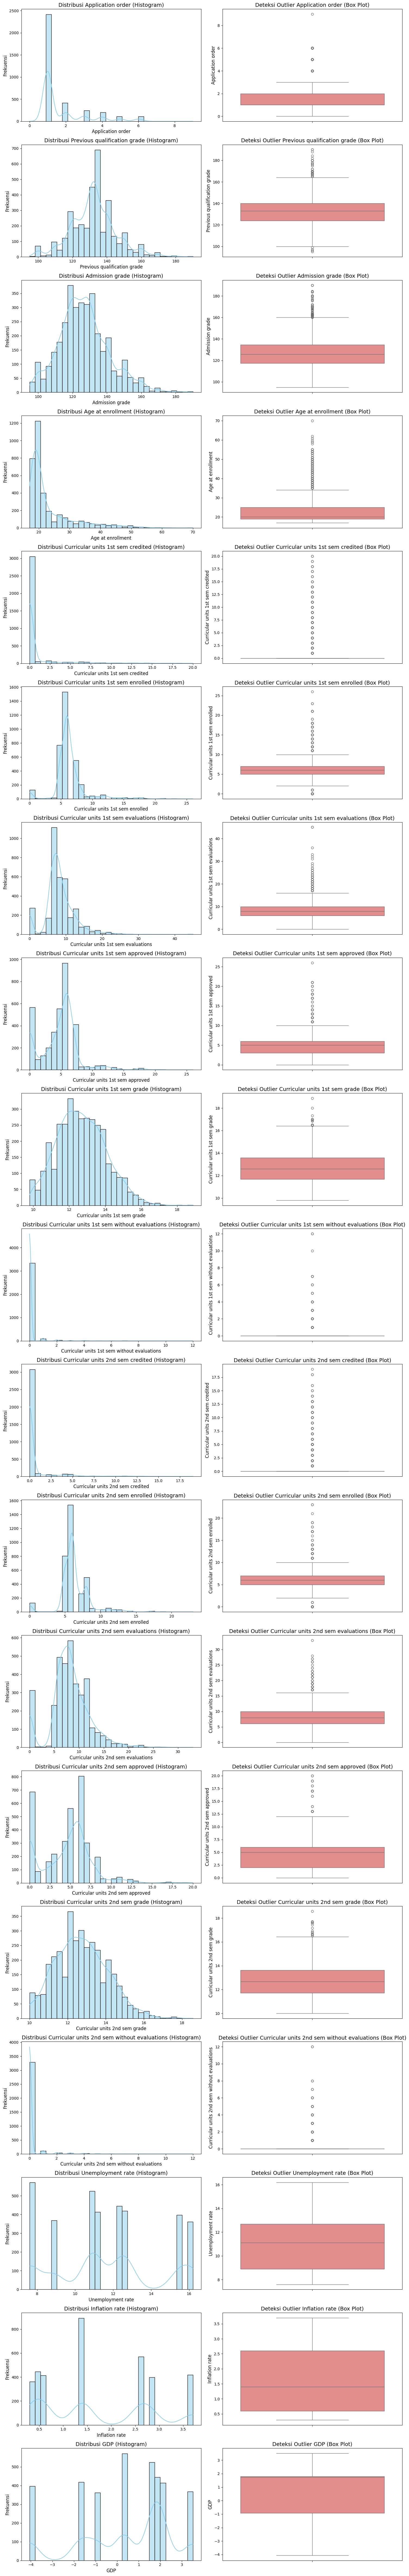

In [20]:
numerical_cols = [
    'Application_order', 'Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment',
    'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations',
    'Unemployment_rate', 'Inflation_rate', 'GDP'
]

n_rows = len(numerical_cols)
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows))
axes = axes.flatten() # To facilitate iteration

for i, col_name in enumerate(numerical_cols):
    # Histogram
    sns.histplot(df_eda[col_name], kde=True, ax=axes[i*2], color='skyblue', bins=30)
    axes[i*2].set_title(f'Distribusi {col_name.replace("_", " ")} (Histogram)', fontsize=14)
    axes[i*2].set_xlabel(col_name.replace("_", " "), fontsize=12)
    axes[i*2].set_ylabel('Frekuensi', fontsize=12)
    axes[i*2].tick_params(axis='x', labelsize=10)
    axes[i*2].tick_params(axis='y', labelsize=10)

    # Box Plot
    sns.boxplot(y=df_eda[col_name], ax=axes[i*2+1], color='lightcoral')
    axes[i*2+1].set_title(f'Deteksi Outlier {col_name.replace("_", " ")} (Box Plot)', fontsize=14)
    axes[i*2+1].set_ylabel(col_name.replace("_", " "), fontsize=12)
    axes[i*2+1].set_xlabel('') # Kosongkan label X
    axes[i*2+1].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()

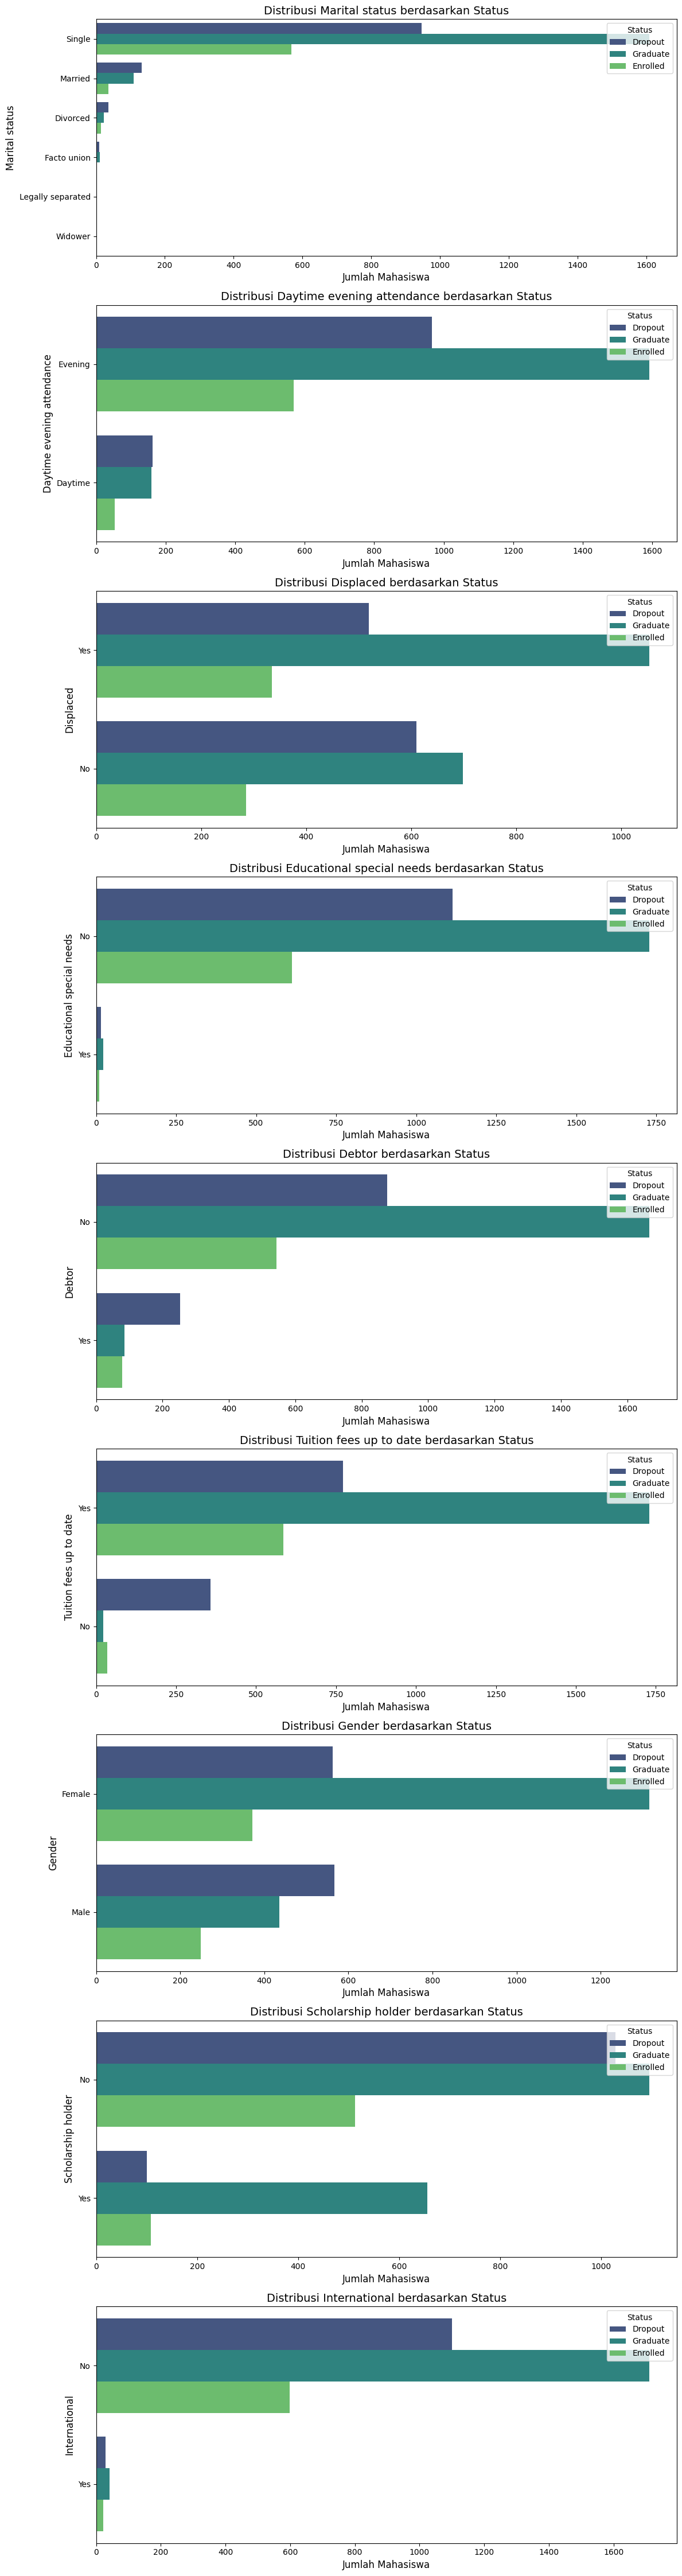

In [21]:
# Visualization of the relationship between low cardinality categorical features and the 'Status' column
# Filter low_cat_cols untuk memastikan 'Status' tidak termasuk sebagai fitur
low_cat_features_for_target = [col for col in low_cat_cols if col != 'Status']

fig, axes = plt.subplots(len(low_cat_features_for_target), 1, figsize=(12, 5 * len(low_cat_features_for_target)))
axes = axes.flatten()

for i, col_name in enumerate(low_cat_features_for_target):
    if col_name not in df_eda.columns:
        print(f"Peringatan: Kolom '{col_name}' tidak ditemukan di DataFrame. Melewatkan plot.")
        continue

    # Visualization
    sns.countplot(data=df_eda, y=col_name, hue='Status',
                  order=df_eda[col_name].value_counts(dropna=False).index,
                  ax=axes[i], palette="viridis")
    axes[i].set_title(f'Distribusi {col_name.replace("_", " ")} berdasarkan Status', fontsize=14)
    axes[i].set_xlabel('Jumlah Mahasiswa', fontsize=12)
    axes[i].set_ylabel(col_name.replace("_", " "), fontsize=12)
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].legend(title='Status', loc='upper right')

plt.tight_layout()
plt.show()

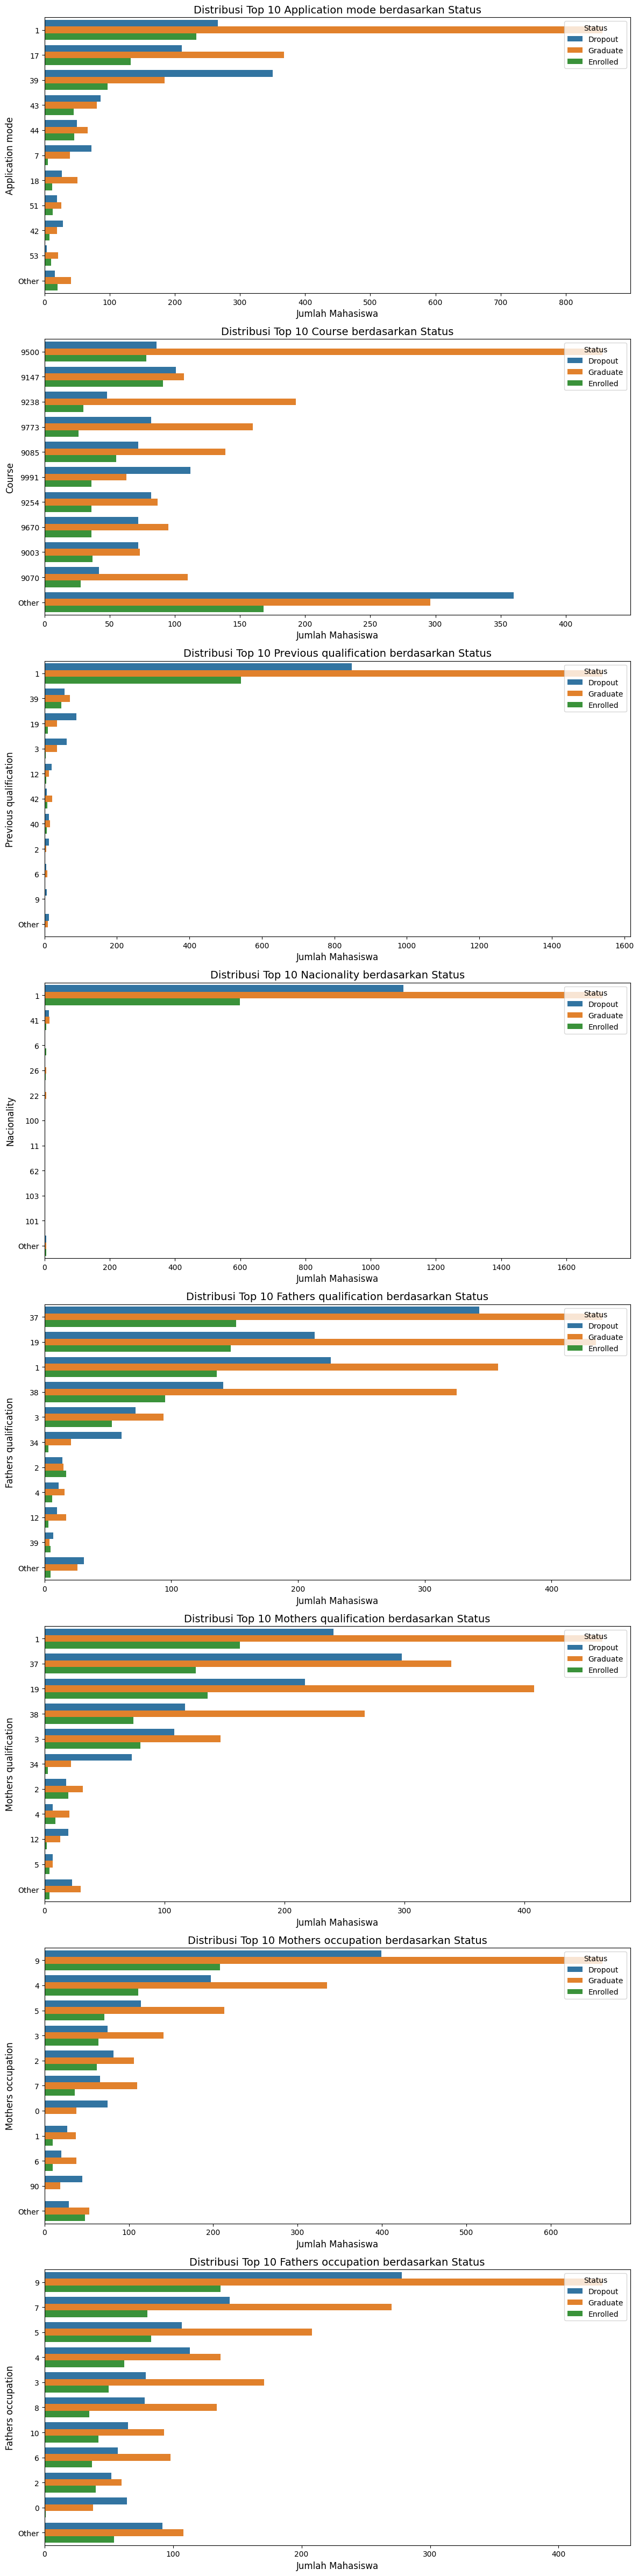

In [22]:
# Visualization of the relationship between high cardinality categorical features and the 'Status' column

top_n_high_cat = 10

fig, axes = plt.subplots(len(high_cat_cols), 1, figsize=(12, 6 * len(high_cat_cols)))
axes = axes.flatten()

for i, col_name in enumerate(high_cat_cols):
    if col_name not in df_eda.columns:
        print(f"Peringatan: Kolom '{col_name}' tidak ditemukan di DataFrame. Melewatkan plot.")
        continue

    # Calculate the frequency and take the top category
    category_counts = df_eda[col_name].value_counts(dropna=False)
    top_categories = category_counts.nlargest(top_n_high_cat).index.tolist()

    # Create a temporary column for visualization with “Other”
    df_eda_temp = df_eda.copy()
    df_eda_temp[f'{col_name}_grouped'] = df_eda_temp[col_name].apply(
        lambda x: x if x in top_categories else 'Other'
    )

    plot_order = df_eda_temp[f'{col_name}_grouped'].value_counts(dropna=False).index.tolist()
    if 'Other' in plot_order:
        plot_order.remove('Other')
        plot_order.append('Other')

    # visualization
    sns.countplot(data=df_eda_temp, y=f'{col_name}_grouped', hue='Status',
                  order=plot_order,
                  ax=axes[i], palette="tab10") # 'tab10' atau 'viridis' atau lainnya yang sesuai

    axes[i].set_title(f'Distribusi Top {top_n_high_cat} {col_name.replace("_", " ")} berdasarkan Status', fontsize=14)
    axes[i].set_xlabel('Jumlah Mahasiswa', fontsize=12)
    axes[i].set_ylabel(col_name.replace("_", " "), fontsize=12)
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].legend(title='Status', loc='upper right')

plt.tight_layout()
plt.show()

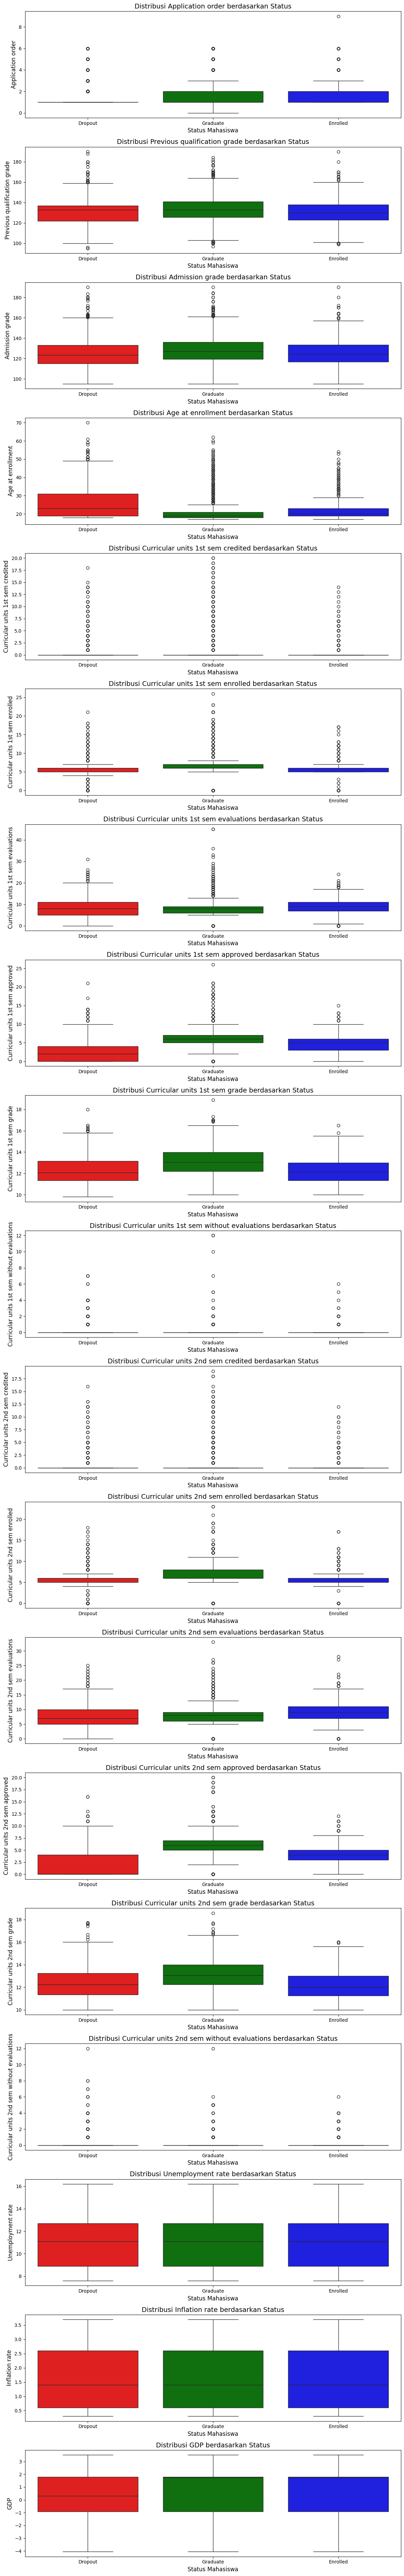

In [25]:
# palette
status_palette = {"Dropout": "red", "Enrolled": "blue", "Graduate": "green"}

fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(12, 4 * len(numerical_cols)))
axes = axes.flatten()

for i, col_name in enumerate(numerical_cols):
    if col_name not in df_eda.columns:
        print(f"Peringatan: Kolom '{col_name}' tidak ditemukan di DataFrame. Melewatkan plot.")
        continue

    # viusalization
    sns.boxplot(data=df_eda, x='Status', y=col_name, ax=axes[i], palette=status_palette)

    axes[i].set_title(f'Distribusi {col_name.replace("_", " ")} berdasarkan Status', fontsize=14)
    axes[i].set_xlabel('Status Mahasiswa', fontsize=12)
    axes[i].set_ylabel(col_name.replace("_", " "), fontsize=12)
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()

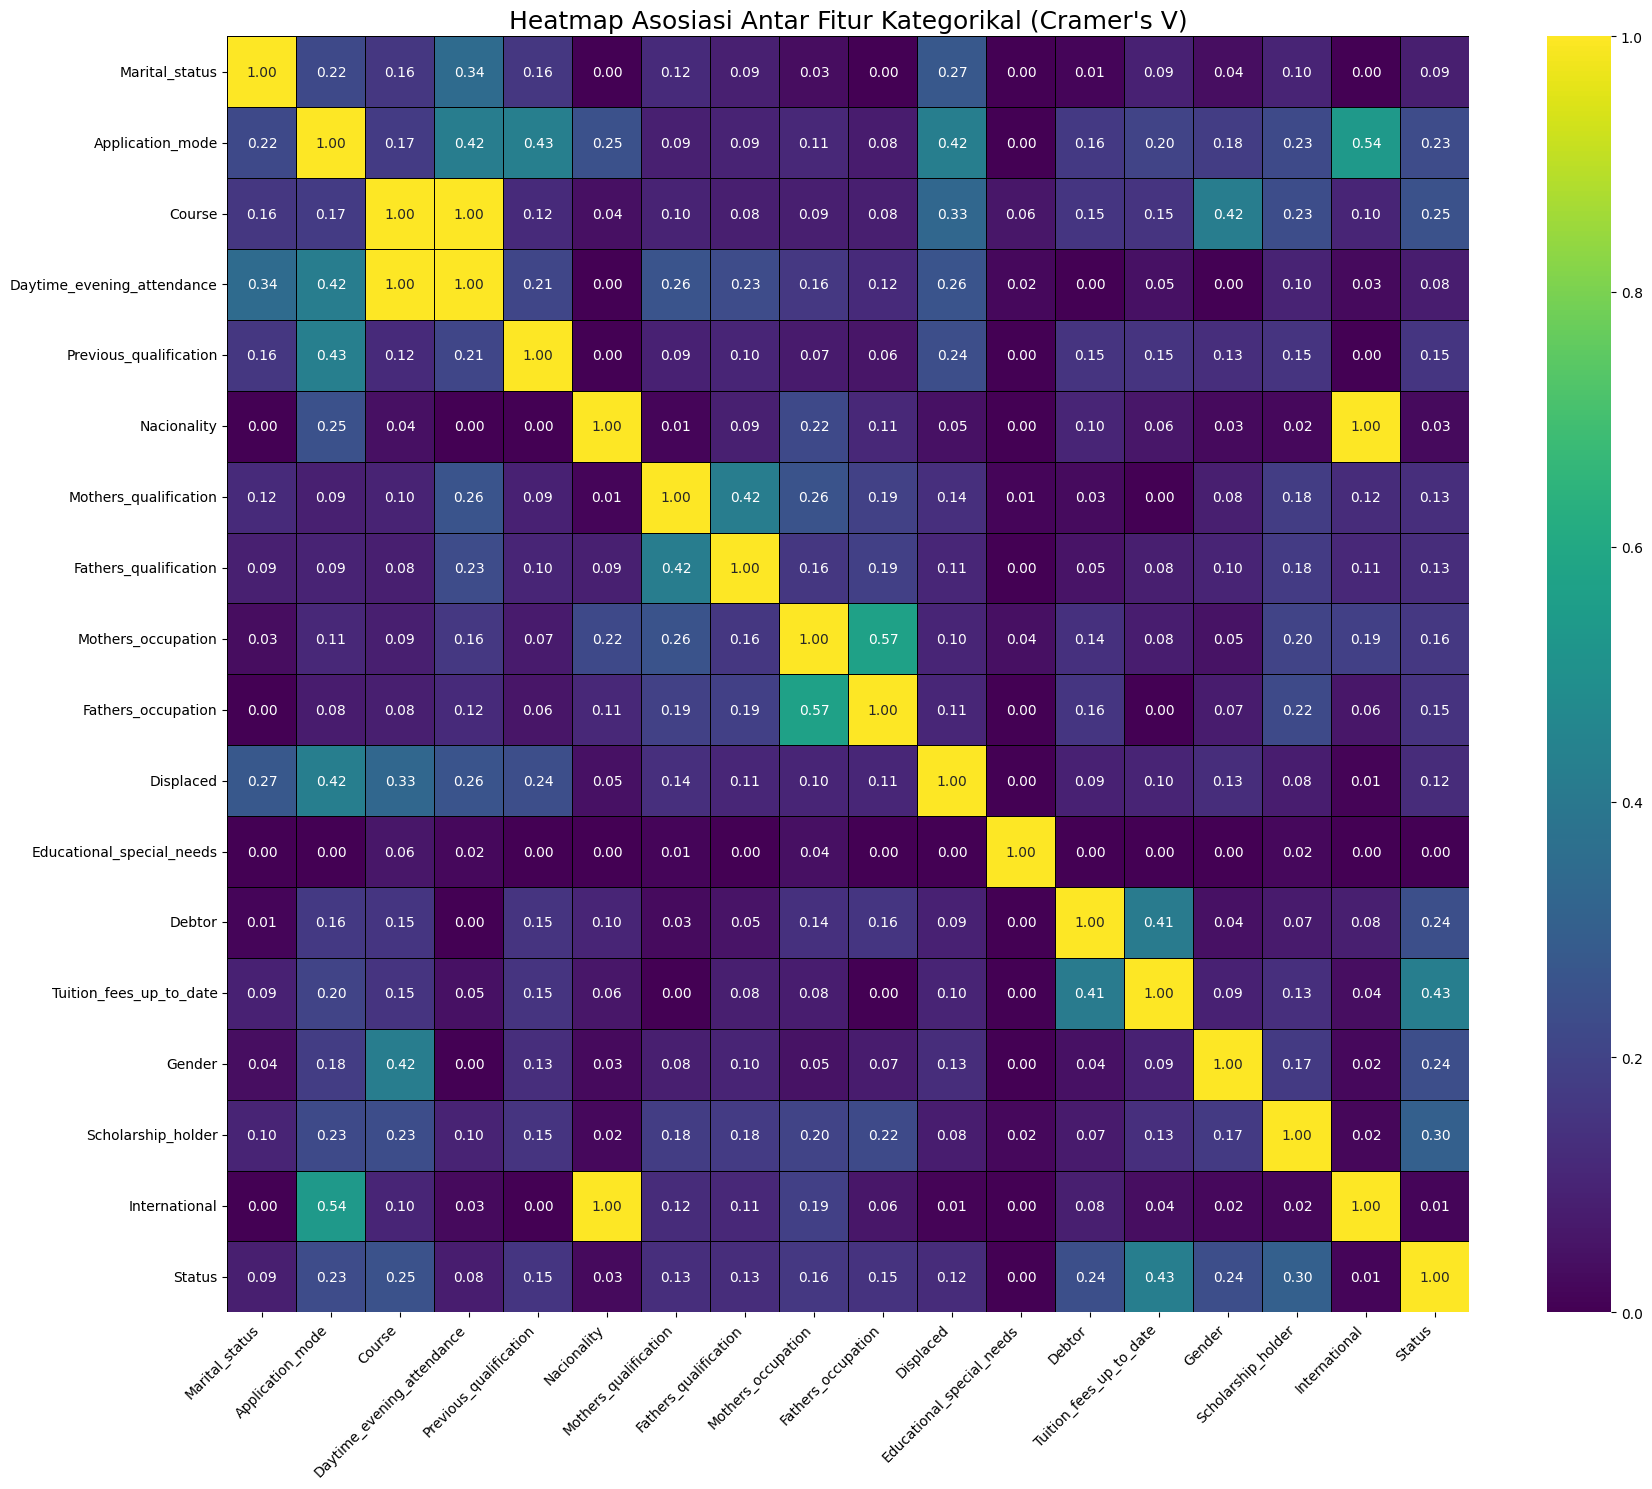

In [26]:
# Heatmap for categorical cols
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


# Initialization of association matrix
n_categories = len(categorical_cols)
cramers_v_matrix = pd.DataFrame(np.ones((n_categories, n_categories)),
                                 columns=categorical_cols,
                                 index=categorical_cols)

# Calculate Cramer's V for each pair of categorical columns
for i in range(n_categories):
    for j in range(i, n_categories): # Calculates only the top diagonal as the matrix is symmetric
        col1 = categorical_cols[i]
        col2 = categorical_cols[j]
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0 # 1 = Correlation with self
        else:
            v_val = cramers_v(df_eda[categorical_cols][col1], df_eda[categorical_cols][col2])
            cramers_v_matrix.loc[col1, col2] = v_val
            cramers_v_matrix.loc[col2, col1] = v_val

plt.figure(figsize=(18, 15))
sns.heatmap(
    cramers_v_matrix,
    annot=True,
    cmap='viridis',
    fmt=".2f",
    linewidths=.5,
    linecolor='black'
)
plt.title('Heatmap Asosiasi Antar Fitur Kategorikal (Cramer\'s V)', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

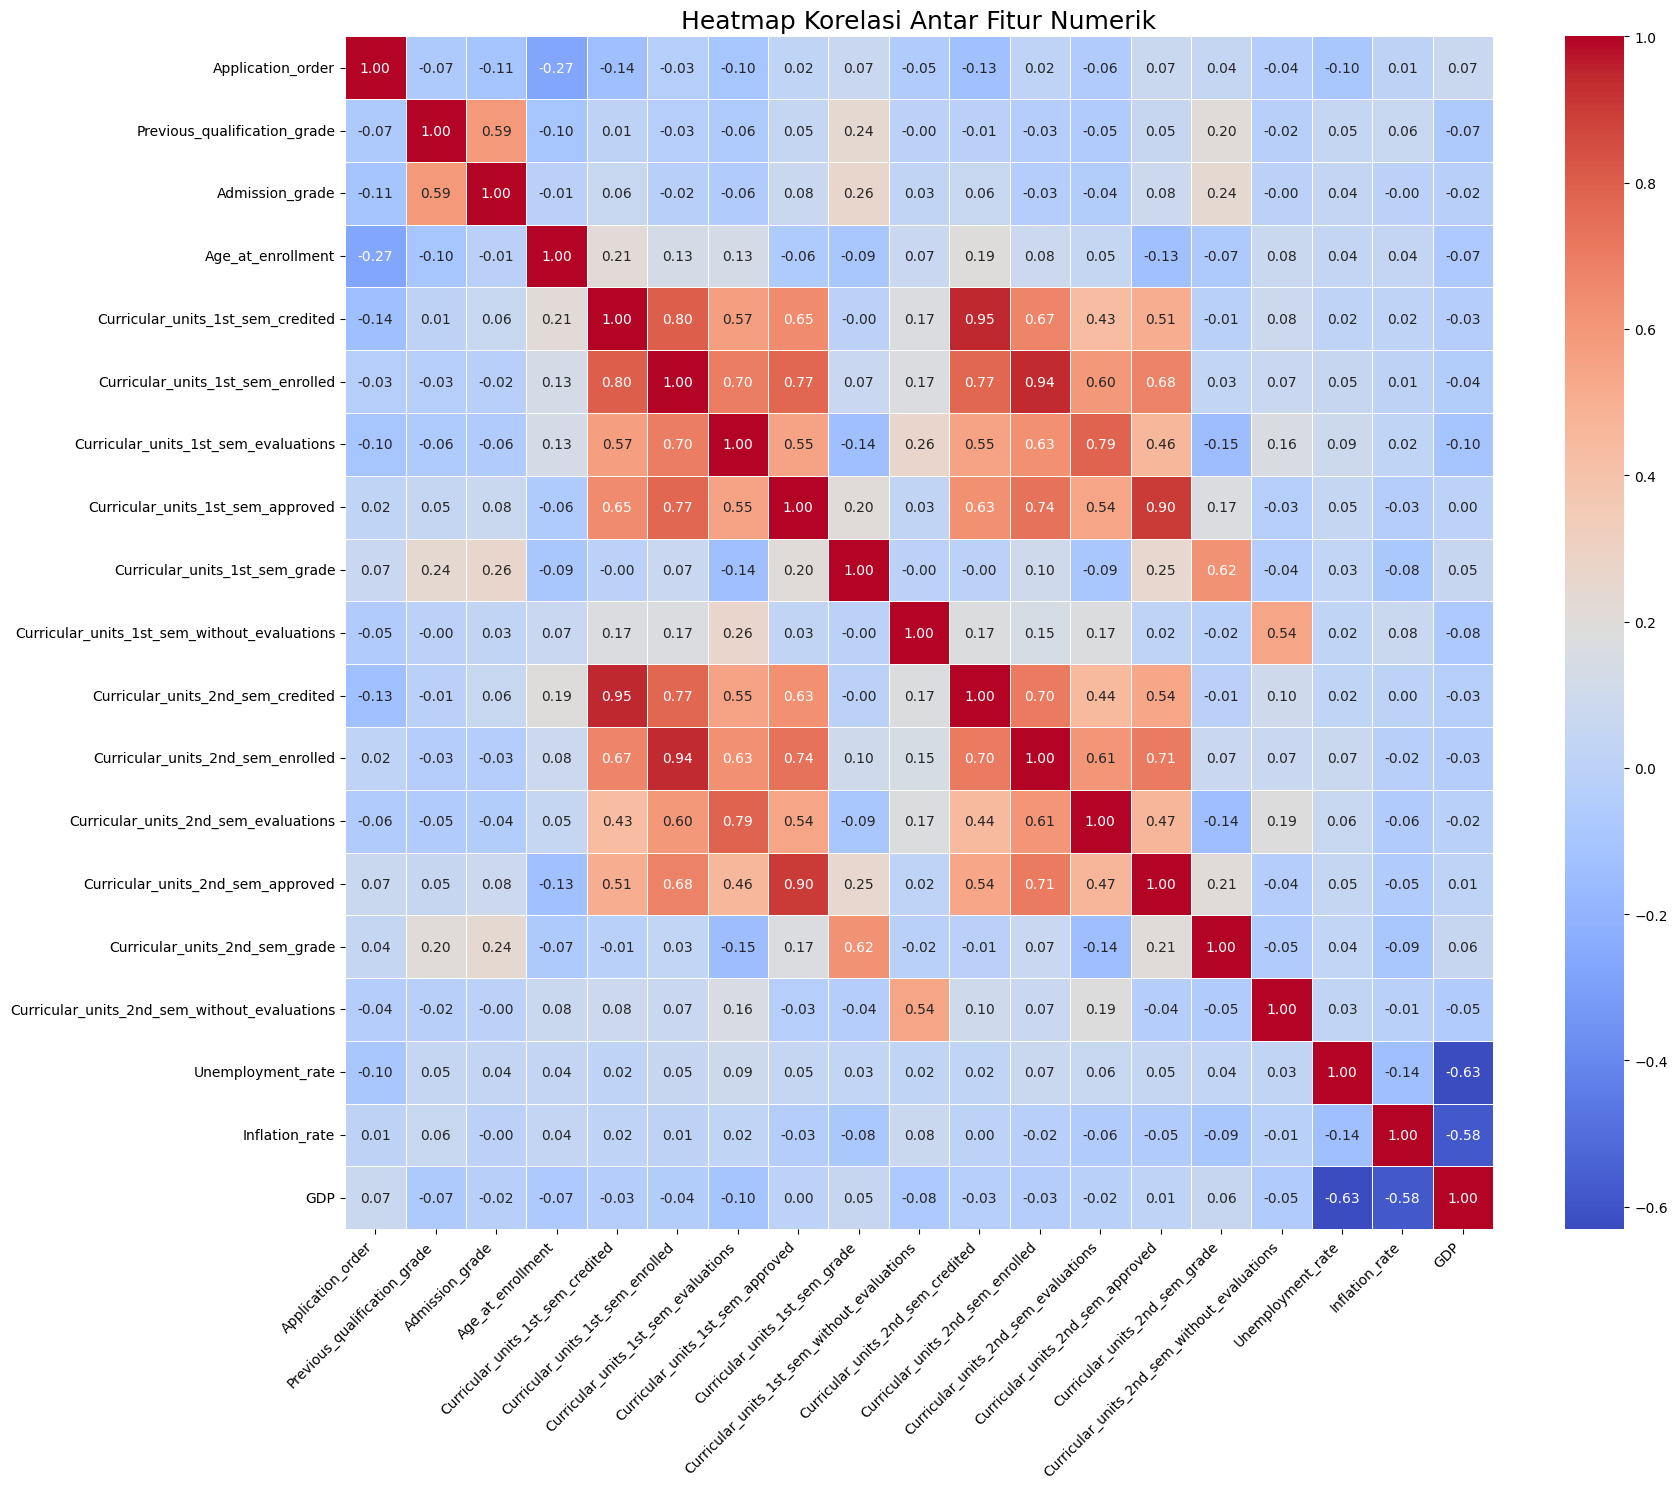

In [27]:
# Heatmap for numerical cols
correlation_matrix = df_eda[numerical_cols].corr()

plt.figure(figsize=(18, 15))
sns.heatmap(
    correlation_matrix,
    annot=True,      # Display the correlation value in each cell
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Heatmap Korelasi Antar Fitur Numerik', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [28]:
# URL = os.environ.get("DATABASE_URL")
# engine = create_engine(URL)

# data_pandas.columns = [col.lower() for col in data_pandas.columns]

# # export data to supabase
# data_pandas.to_sql('student', con=engine, if_exists='replace', index=False)

**Explanation**

**Demografi Mahasiswa Umum:**

Mayoritas mahasiswa adalah **lajang (Single)**, menghadiri perkuliahan di **malam hari (Daytime attendance)**, **sedikit dominan berstatus displaced**, **mayoritas tidak berkebutuhan khusus**, **bukan debitur**, **baiya pendidikan tidak menunggak**, mayoritas **perempuan**, **tidak memiliki beasiswa**, mayoritas perempuan dan **bukan penerima beasiswa** dan **bukan mahasiswa internasional**.

Proporsi status akhir menunjukkan Lulus (Graduate) adalah yang terbanyak, diikuti oleh Putus Sekolah (Dropout), dan paling sedikit adalah Sedang Berkuliah (Enrolled). Ini mengindikasikan adanya ketidakseimbangan kelas pada variabel target yang perlu diperhatikan dalam pemodelan.

<br>

**Faktor Keuangan adalah Prediktor Kuat:**

Mahasiswa yang pendidikan tidak menunggak dan memiliki beasiswa memiliki probabilitas kelulusan yang secara signifikan lebih tinggi dan probabilitas putus sekolah yang lebih rendah. Ini adalah salah satu insight terkuat yang menunjukkan bahwa dukungan finansial dan kepatuhan pembayaran adalah faktor krusial dalam keberhasilan studi.
Sebaliknya, mahasiswa yang berstatus debitur memiliki kecenderungan putus sekolah yang lebih tinggi.

<br>

**Kinerja Akademik Sangat Berpengaruh:**

Nilai Previous_qualification_grade dan Admission_grade yang lebih tinggi secara jelas berkorelasi dengan status Graduate.
Nilai Curricular_units_1st_sem_grade dan Curricular_units_2nd_sem_grade adalah prediktor yang sangat kuat. Mahasiswa yang lulus cenderung memiliki nilai rata-rata yang jauh lebih tinggi di kedua semester dibandingkan dengan mahasiswa yang putus sekolah atau sedang berkuliah.
Demikian pula, jumlah unit yang disetujui (approved) dan dikreditkan (credited) juga secara positif terkait dengan kelulusan.

<br>

**Usia dan Aplikasi Awal Berperan:**

Mahasiswa yang lebih muda saat mendaftar cenderung lebih mungkin untuk lulus. Mahasiswa yang putus sekolah cenderung memiliki rentang usia yang lebih luas atau sedikit lebih tua rata-ratanya.
Mahasiswa yang lulus cenderung memiliki Application_order (urutan aplikasi) yang lebih rendah, menunjukkan bahwa mereka mungkin lebih berhasil dalam percobaan pertama atau awal mendaftar.
Pengaruh Lingkungan Makroekonomi:

Terdapat indikasi bahwa tingkat pengangguran, tingkat inflasi, dan GDP juga memiliki asosiasi dengan status mahasiswa. Umumnya, periode dengan tingkat pengangguran dan inflasi yang lebih rendah serta GDP yang lebih tinggi cenderung berkorelasi dengan tingkat kelulusan yang lebih baik. Ini menunjukkan bahwa kondisi ekonomi makro dapat memengaruhi keputusan dan kemampuan mahasiswa untuk melanjutkan studi.

<br>

**Hubungan Antar Fitur:**

Multikolinearitas Teridentifikasi: Heatmap korelasi numerik menunjukkan korelasi yang sangat tinggi antara fitur-fitur terkait unit kurikuler (misalnya, 1st_sem_grade dan 2nd_sem_grade, serta approved dan grade dalam semester yang sama). Ini adalah wawasan penting untuk tahap feature selection atau dimensionality reduction di kemudian hari.
Asosiasi Kategorikal yang Kuat: Cramer's V menegaskan kembali bahwa fitur-fitur seperti Tuition_fees_up_to_date, Scholarship_holder, dan Debtor memiliki asosiasi terkuat dengan Status. Fitur-fitur lain seperti Course, Application_mode, dan Previous_qualification juga menunjukkan asosiasi yang signifikan.



### Outlier tidak perlu dihapus pada tahap ini.

Alasan:

- Tujuan Model: Outlier dalam kasus ini bisa menjadi indikator penting untuk mendeteksi dropout, terutama jika terdapat nilai ekstrem dalam nilai akademik atau faktor ekonomi yang benar-benar mencerminkan realitas.

- Informasi Penting: Dalam konteks sosial dan pendidikan, nilai ekstrem sering kali adalah bagian dari pola nyata, misalnya mahasiswa dengan grade sangat rendah atau pengangguran tinggi dalam keluarga bisa jadi memang lebih rentan dropout.

- Tidak Ada Justifikasi Visual/Lainnya untuk Menghapus: Hingga bagian heatmap, belum ada analisis distribusi atau boxplot per fitur yang menunjukkan adanya outlier ekstrim yang merusak distribusi data atau model.

- Model Tree-based yang akan digunakan nanti (Decision Tree, Random Forest) cenderung robust terhadap outlier, sehingga pembersihan outlier tidak sepenting jika Anda menggunakan model yang sangat sensitif seperti regresi linier atau KNN.

## Data Preparation / Preprocessing

In [29]:
# Split train-test
train_df, test_df = train_test_split(cleaned_df, test_size=0.2, random_state=42, stratify=cleaned_df['Status'])
print(f"Train count: {train_df.count()}")
print(f"Test count: {test_df.count()}")

Train count: Marital_status                                  2800
Application_mode                                2800
Application_order                               2800
Course                                          2800
Daytime_evening_attendance                      2800
Previous_qualification                          2800
Previous_qualification_grade                    2800
Nacionality                                     2800
Mothers_qualification                           2800
Fathers_qualification                           2800
Mothers_occupation                              2800
Fathers_occupation                              2800
Admission_grade                                 2800
Displaced                                       2800
Educational_special_needs                       2800
Debtor                                          2800
Tuition_fees_up_to_date                         2800
Gender                                          2800
Scholarship_holder               

In [30]:
# Undersampling

min_class = train_df['Status'].value_counts().min()
undersampled = []

for cls in train_df['Status'].unique():
    cls_df = train_df[train_df['Status'] == cls]
    undersampled.append(resample(cls_df, replace=False, n_samples=min_class, random_state=42))

undersampled_train_df = pd.concat(undersampled)

In [31]:
# Lowercase column names
undersampled_train_df.columns = undersampled_train_df.columns.str.lower()
test_df.columns = test_df.columns.str.lower()

In [32]:
# Implement OrdinalEncoder for all categories
categorical_cols_lower = [col.lower() for col in categorical_cols if col.lower() != 'status']
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit and transform to train + test
X_train_cat = encoder.fit_transform(undersampled_train_df[categorical_cols_lower])
X_test_cat = encoder.transform(test_df[categorical_cols_lower])


In [33]:
# Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_cat)
X_test_scaled = scaler.transform(X_test_cat)

In [34]:
pca1 = PCA(n_components=5)
pca2 = PCA(n_components=2)

X_train_pca1 = pca1.fit_transform(X_train_scaled)
X_train_pca2 = pca2.fit_transform(X_train_scaled)

# Combine features
import numpy as np
X_train_final = np.hstack([X_train_pca1, X_train_pca2])
y_train_final = undersampled_train_df['status']


## Modeling

In [35]:
# Decision Tree objective with Hyperopt Optimization
def objective_dt(params):
    clf = DecisionTreeClassifier(max_depth=int(params['max_depth']), random_state=42)
    clf.fit(X_train_final, y_train_final)
    acc = accuracy_score(y_train_final, clf.predict(X_train_final))
    return {'loss': -acc, 'status': STATUS_OK}

best_params_dt = fmin(
    fn=objective_dt,
    space={'max_depth': hp.quniform('max_depth', 2, 10, 1)},
    algo=tpe.suggest,
    max_evals=20,
    trials=Trials()
)

100%|██████████| 20/20 [00:00<00:00, 50.06trial/s, best loss: -0.6753856472166331]


In [36]:
dt_model = DecisionTreeClassifier(max_depth=int(best_params_dt['max_depth']), random_state=42)
dt_model.fit(X_train_scaled, y_train_final)

DecisionTreeClassifier(max_depth=9, random_state=42)

In [37]:
# Random Forest objective with Hyperopt Optimization
def objective_rf(params):
    clf = RandomForestClassifier(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        random_state=42
    )
    clf.fit(X_train_final, y_train_final)
    acc = accuracy_score(y_train_final, clf.predict(X_train_final))
    return {'loss': -acc, 'status': STATUS_OK}

best_params_rf = fmin(
    fn=objective_rf,
    space={
        'n_estimators': hp.quniform('n_estimators', 50, 150, 10),
        'max_depth': hp.quniform('max_depth', 3, 10, 1)
    },
    algo=tpe.suggest,
    max_evals=20,
    trials=Trials()
)

100%|██████████| 20/20 [00:06<00:00,  2.91trial/s, best loss: -0.880617035546613]


In [38]:
# Final Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('rf', RandomForestClassifier(
        n_estimators=int(best_params_rf['n_estimators']),
        max_depth=int(best_params_rf['max_depth']),
        random_state=42
    ))
])

pipeline.fit(X_train_scaled, y_train_final)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('rf', RandomForestClassifier(max_depth=10, random_state=42))])

In [39]:
# Set the label encoder with the label sequence
# Retrieve labels from the entire dataset (not just the undersampled ones)
all_labels = cleaned_df['Status'].unique()
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

LabelEncoder()

In [40]:
# predict Decission Tree
y_pred_dt = dt_model.predict(X_train_scaled)
y_pred_dt_enc = label_encoder.transform(y_pred_dt)

In [41]:
# predict Random Forest
y_pred_rf = pipeline.predict(X_train_scaled)
y_pred_rf_enc = label_encoder.transform(y_pred_rf)

In [42]:
# Transform to numbers
y_train_enc = label_encoder.transform(y_train_final)
y_pred_rf_enc = label_encoder.transform(y_pred_rf)

## Evaluation

In [43]:
def evaluating(y_true, y_pred, labels, model_name):
    print(f"\n===== {model_name} Evaluation =====")
    print(classification_report(y_true=y_true, y_pred=y_pred, target_names=labels))

    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()



===== Decision Tree Evaluation =====
              precision    recall  f1-score   support

     Dropout       0.77      0.67      0.72       497
    Enrolled       0.65      0.63      0.64       497
    Graduate       0.64      0.75      0.69       497

    accuracy                           0.68      1491
   macro avg       0.69      0.68      0.68      1491
weighted avg       0.69      0.68      0.68      1491



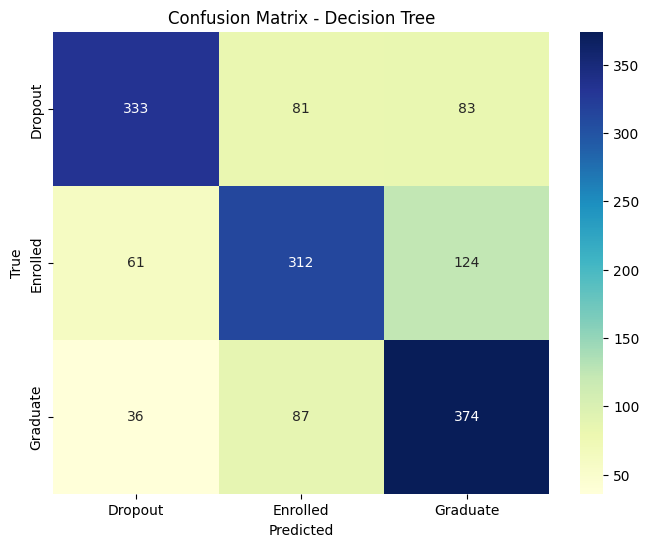

In [44]:
# Decision Tree evaluation
evaluating(y_train_enc, y_pred_dt_enc, labels=label_encoder.classes_, model_name="Decision Tree")


===== Random Forest Evaluation =====
              precision    recall  f1-score   support

     Dropout       0.86      0.97      0.91       443
    Enrolled       0.95      0.88      0.91       537
    Graduate       0.92      0.90      0.91       511

    accuracy                           0.91      1491
   macro avg       0.91      0.92      0.91      1491
weighted avg       0.92      0.91      0.91      1491



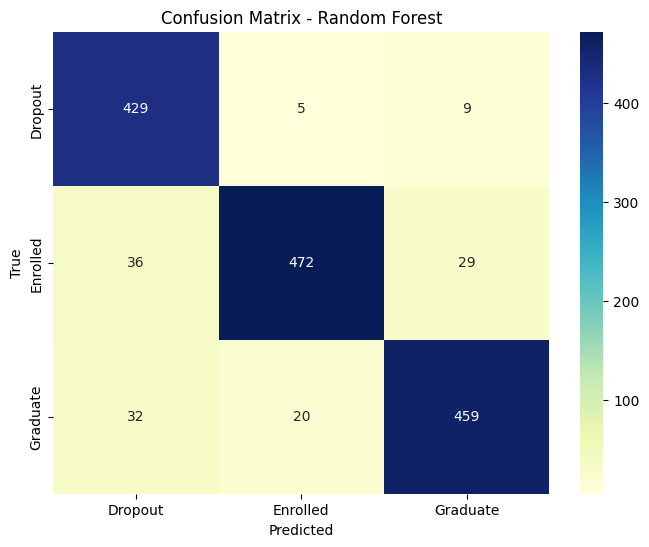

In [45]:
# Random Forest evaluation
evaluating(y_pred_rf_enc, y_train_enc, labels=["Dropout", "Enrolled", "Graduate"], model_name="Random Forest")

In [46]:
# save model, label dan pca
joblib.dump(pipeline, 'rf_best_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(pca1, 'pca_model.pkl')

['pca_model.pkl']

In [47]:
# List of original feature names before PCA (in X_train_scaled order)
original_features = [col.lower() for col in categorical_cols if col.lower() != 'status']

# Take the loading matrix from PCA
pca1_components = pca1.components_  # shape: (5, num_features)
pca1_matrix = pca1_components.T     # transpose -> shape: (num_features, 5)

pc_df = pd.DataFrame(pca1_matrix, columns=[f'PC{i+1}' for i in range(pca1_matrix.shape[1])], index=original_features)

# Calculate the absolute contribution to PC1
pc_df['PC1_abs'] = pc_df['PC1'].abs()
pc_df_sorted_pc1 = pc_df.sort_values(by='PC1_abs', ascending=False)

print("Kontribusi fitur ke PC1:")
print(pc_df_sorted_pc1[['PC1']])

# Calculate the total absolute contribution to all PCs (PC1-5)
pc_df['total_abs'] = pc_df[[f'PC{i+1}' for i in range(5)]].abs().sum(axis=1)
pc_df_sorted_total = pc_df.sort_values(by='total_abs', ascending=False)

print("\nTotal kontribusi fitur terhadap semua komponen PCA:")
print(pc_df_sorted_total[['total_abs']])

Kontribusi fitur ke PC1:
                                 PC1
displaced                   0.703647
gender                     -0.491839
application_mode           -0.280065
scholarship_holder          0.236389
daytime_evening_attendance  0.207497
tuition_fees_up_to_date     0.171121
previous_qualification     -0.156699
debtor                     -0.148959
course                      0.061552
mothers_qualification      -0.055559
marital_status             -0.050627
mothers_occupation         -0.008829
educational_special_needs   0.004882
fathers_qualification      -0.004469
fathers_occupation          0.003965
nacionality                 0.001388
international              -0.000175

Total kontribusi fitur terhadap semua komponen PCA:
                            total_abs
scholarship_holder           1.932995
displaced                    1.879074
gender                       1.791300
debtor                       1.405681
fathers_qualification        1.272689
tuition_fees_up_to_date     

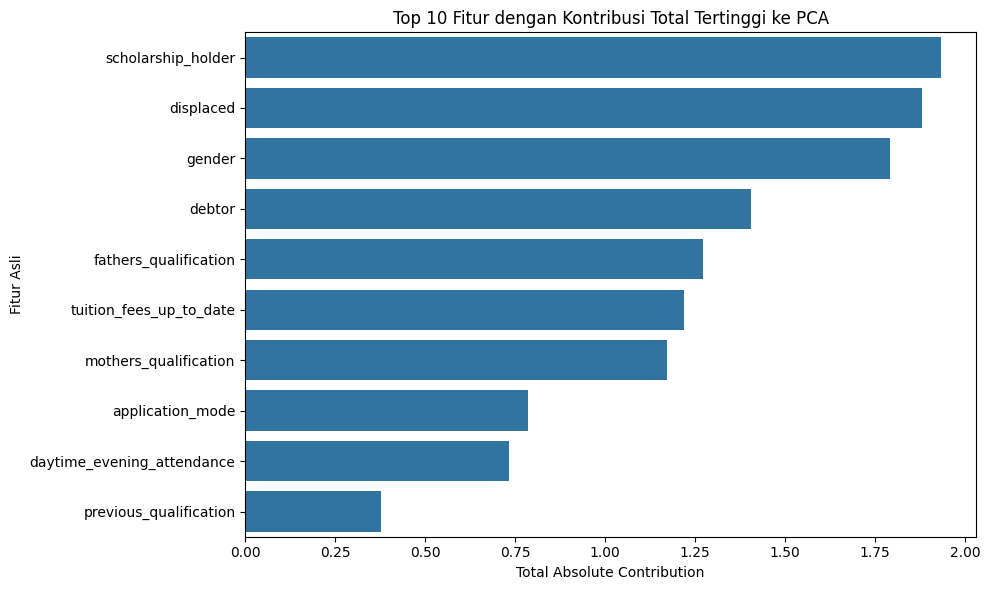

In [48]:
# Visualization of total feature contribution to PCA
plt.figure(figsize=(10, 6))
sns.barplot(
    x=pc_df_sorted_total['total_abs'].head(10),
    y=pc_df_sorted_total.head(10).index
)
plt.title("Top 10 Fitur dengan Kontribusi Total Tertinggi ke PCA")
plt.xlabel("Total Absolute Contribution")
plt.ylabel("Fitur Asli")
plt.tight_layout()
plt.show()

## Pertanyaan Bisnis & Jawaban
1. Berapa proporsi mahasiswa yang keluar (drop out) dibandingkan total mahasiswa?
  - International Student :
    - 32,27% Dropout
    - 17,57% Enrolled
    - 50,16% Graduate
  - Domestic student :
    - 31,52% Dropout
    - 23,91% Enrolled
    - 44,57% Graduate

2. Bagaimana distribusi status mahasiswa berdasarkan berbagai fitur

  Dari berbagai grafik bar dan boxplot:
  - **Beasiswa :** Mahasiswa yg menerima beasiswa cenderung memiliki tingkat dropout lebih tinggi daripada yg tidak meneirma beasiswa
  - **Jenis Kelamin:** Mahasiswa laki-laki cenderung memiliki tingkat dropout lebih tinggi dibanding perempuan.
  
  - **Umur saat masuk kuliah:** Umur lebih muda cenderung memiliki tingkat kelulusan yang lebih tinggi.
  
  - **Status Pernikahan:** Mahasiswa lajang mendominasi seluruh kategori, tetapi pernikahan tampaknya tidak signifikan memengaruhi status
  
  - **Pekerjaan & Pendidikan orang tua:** Mahasiswa dengan orang tua berpendidikan lebih tinggi atau bekerja dalam posisi profesional cenderung memiliki tingkat kelulusan lebih baik.
  
  - **Kredit & evaluasi semester:** Mahasiswa yang mengambil dan menyelesaikan lebih banyak mata kuliah semester 1 dan 2 memiliki kemungkinan lulus yang jauh lebih tinggi.
  
  - **Grade penerimaan (Admission Grade):** Semakin tinggi admission grade, semakin besar peluang untuk lulus.
  
  - **Faktor ekonomi (GDP, Pengangguran, Inflasi):** Korelasi kecil tapi terlihat bahwa lingkungan ekonomi yang lebih baik mendukung tingkat kelulusan lebih tinggi.

  3. Faktor yang paling mempengaruhi kelulusan/dropout mahasiswa?
  
    Berdasarkan PCA
    - Scholarship_holder
    - Displaced        
    - Gender                      
    - Debtor             
    - Tuition_fees_up_to_date    
    - mothers_qualification
    - fathers_qualification           
    - dst

# Kesimpulan
1. Secara keseluruhan, tingkat dropout mahasiswa, baik internasional maupun domestik, cukup tinggi, dan status kelulusan sangat dipengaruhi oleh berbagai faktor.
2. Faktor-faktor yg menjadi pemicu mahasiswa dropout dapat dilihat melalui hasil analisis PCA yang meliputi
  - Perbandingan mahasiswa yg tidak menerima beasiswa cenderung memiliki tingkat dropout lebih tinggi daripada yg tidak meneirma beasiswa
  - Mahasiswa yg terlantar cenderung memiliki tingkat dropout lebih tinggi
  - Mahasiswa laki-laki cenderung memiliki tingkat dropout lebih tinggi dibanding perempuan.
  - Keluarga mahasiswa yang memiliki pinjaman cenderung memiliki tingkat dropout yang tinggi
  - Masalah biaya pendidikan menunggak juga menjadi salah satu faktor penting

3. Pipeline data preprocessing dan model prediktif menggunakan Random Forest telah di-otomatisasi menggunakan Spark ML. Model ini memungkinkan integrasi ke dalam sistem operasional institusi untuk memantau status setiap siswa secara langsung dan mengeluarkan peringatan dini bila probabilitas dropout melewati ambang batas.

# Action Items
1. **Perkuat dukungan akademik di semester awal**
Banyak mahasiswa gagal di semester awal. Fokuskan bimbingan dan monitoring intensif pada semester 1 dan 2.

2. **Bantu mahasiswa dengan kesulitan keuangan**
Fitur Debtor dan Tuition_fees_up_to_date sangat memengaruhi kelulusan. Tawarkan program bantuan keuangan atau beasiswa.

3. **Pantau dan evaluasi mahasiswa dengan latar belakang kurang mampu**
Mahasiswa dengan orang tua dengan pendidikan rendah atau pendapatan rendah memerlukan perhatian tambahan.

4. **Fasilitasi pembelajaran yang mendukung penyelesaian mata kuliah**
Mahasiswa yang menyelesaikan lebih banyak mata kuliah punya peluang lulus lebih besar. Dorong partisipasi dan hindari "tidak hadir ujian".